# Stroke Classification Model

## 1. Firstly the necessary libraries are loaded including pandas, scipy and matplotlib

In [24]:
import time
import joblib
import graphviz
import matplotlib
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

from sklearn.pipeline import Pipeline
from sklearn.tree import export_graphviz
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

print("The libraries were successfully loaded!")

The libraries were successfully loaded!


## 2. The cleansed dataset is loaded from a csv and the top rows are loaded

In [25]:
# load the training dataset
df_stroke = pd.read_csv('data/cleansed-healthcare-dataset-stroke-data.csv',delimiter=',',header='infer')
df_stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,1,80.0,0,1,1,2,0,105.92,32.5,2,1
2,0,49.0,0,0,1,2,1,171.23,34.4,3,1
3,0,79.0,1,0,1,3,0,174.12,24.0,2,1
4,1,81.0,0,0,1,2,1,186.21,29.0,1,1


## 3. The features in the dataset are seperated from the label and print the values of the first 4 patients

In [26]:
# Separate features and labels
features = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']
label = 'stroke'
X, y = df_stroke[features].values, df_stroke[label].values

for n in range(0,4):
    print("Patient", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Patient 1 
  Features: [1.0, 67.0, 0.0, 1.0, 1.0, 2.0, 1.0, 228.69, 36.6, 1.0] 
  Label: 1
Patient 2 
  Features: [1.0, 80.0, 0.0, 1.0, 1.0, 2.0, 0.0, 105.92, 32.5, 2.0] 
  Label: 1
Patient 3 
  Features: [0.0, 49.0, 0.0, 0.0, 1.0, 2.0, 1.0, 171.23, 34.4, 3.0] 
  Label: 1
Patient 4 
  Features: [0.0, 79.0, 1.0, 0.0, 1.0, 3.0, 0.0, 174.12, 24.0, 2.0] 
  Label: 1


## 4. The dataset is split into a training and testing dataset

In [27]:
# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.size, X_test.size))

Training cases: 34360
Test cases: 14730


## 5. The training dataset is used to train the machine learning model

In [28]:
# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear", random_state=0).fit(X_train, y_train)
print (model)

LogisticRegression(C=100.0, random_state=0, solver='liblinear')


## 6. The testing dataset is used to test the machine learning model that was trained

In [29]:
predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)

Predicted labels:  [0 0 0 ... 0 0 0]
Actual labels:     [0 0 0 ... 0 0 0]


## 7. The accuracy of the model is determined from using the testing dataset

In [30]:
print('The accuracy is: ', accuracy_score(y_test, predictions))

The accuracy is:  0.9633401221995926


## 8. Create a Scikit-Learn *classification report* from the testing dataset
The classification report includes the following metrics for each class  (0 and 1)
* *Precision*: Of the predictons the model made for this class, what proportion were correct?
* *Recall*: Out of all of the instances of this class in the test dataset, how many did the model identify?
* *F1-Score*: An average metric that takes both precision and recall into account.
* *Support*: How many instances of this class are there in the test dataset?

In [31]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1418
           1       1.00      0.02      0.04        55

    accuracy                           0.96      1473
   macro avg       0.98      0.51      0.51      1473
weighted avg       0.96      0.96      0.95      1473



## 9. Identify the **precision_score** and **recall_score** metrics to answer the following two questions respectively


- Q1 Of all the patients the model predicted will have a stroke, how many had a stroke?
- Q2 Of all the ptients that are had a stroke, how many did the model identify?

In [32]:
print("Overall Precision (Q1):",precision_score(y_test, predictions))
print("Overall Recall (Q2):",recall_score(y_test, predictions))

Overall Precision (Q1): 1.0
Overall Recall (Q2): 0.01818181818181818


## 10. Tabulate a confusion matrix

The confusion matric has the following structure: 

<table style="border: 1px solid black;">
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;color: black;" bgcolor="lightgray">True Negatives</td><td style="border: 1px solid black;color: black;" bgcolor="white">False Positives</td>
    </tr>
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;color: black;" bgcolor="white">False Negatives</td><td style="border: 1px solid black;color: black;" bgcolor="lightgray">True Positives</td>
    </tr>
</table>

Whereby the metrics mean:
* *True Positives*: The predicted label and the actual label are both 1.
* *False Positives*: The predicted label is 1, but the actual label is 0.
* *False Negatives*: The predicted label is 0, but the actual label is 1.
* *True Negatives*: The predicted label and the actual label are both 0.

In [33]:
# Print the confusion matrix
cm = confusion_matrix(y_test, predictions)
y_scores = model.predict_proba(X_test)
print(cm)

[[1418    0]
 [  54    1]]


## 11. Create a received operator characteristic (ROC) chart

The decision to score a prediction as a 1 or a 0 depends on the threshold to which the predicted probabilties are compared. If we were to change the threshold, it would affect the predictions; and therefore change the metrics in the confusion matrix. A common way to evaluate a classifier is to examine the *true positive rate* (which is another name for recall) and the *false positive rate* for a range of possible thresholds. These rates are then plotted against all possible thresholds to form a chart known as a *received operator characteristic (ROC) chart*, like this:

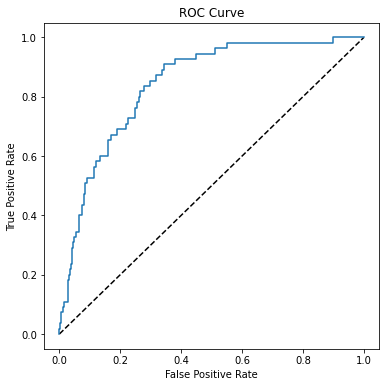

In [34]:
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

The ROC chart shows the curve of the true and false positive rates for different threshold values between 0 and 1. A perfect classifier would have a curve that goes straight up the left side and straight across the top. The diagonal line across the chart represents the probability of predicting correctly with a 50/50 random prediction; so you obviously want the curve to be higher than that (or your model is no better than simply guessing!).

## 12. Identify the area under the curve (AUC)
The area under the curve (AUC) is a value between 0 and 1 that quantifies the overall performance of the model. The closer to 1 this value is, the better the model. Once again, scikit-Learn includes a function to calculate this metric.

In [35]:
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.8420310296191819


## 13. Save the classification model

In [36]:
# Save the model as a pickle file
filename = './models/logistic_regression_stroke_model.pkl'
joblib.dump(model, filename)

['./models/logistic_regression_stroke_model.pkl']

## 14. Perform preprocessing in a pipeline

In this case, the ROC curve and its AUC indicate that the model performs better than a random guess which is not bad considering we performed very little preprocessing of the data.

In practice, it's common to perform some preprocessing of the data to make it easier for the algorithm to fit a model to it. There's a huge range of preprocessing transformations you can perform to get your data ready for modeling, but we'll limit ourselves to a few common techniques:

- Scaling numeric features so they're on the same scale. This prevents feaures with large values from producing coefficients that disproportionately affect the predictions.
- Encoding categorical variables. For example, by using a *one hot encoding* technique you can create individual binary (true/false) features for each possible category value.

To apply these preprocessing transformations, we'll make use of a Scikit-Learn feature named *pipelines*. These enable us to define a set of preprocessing steps that end with an algorithm. You can then fit the entire pipeline to the data, so that the model encapsulates all of the preprocessing steps as well as the regression algorithm. This is useful, because when we want to use the model to predict values from new data, we need to apply the same transformations (based on the same statistical distributions and catagory encodings used with the training data).

>**Note**: The term *pipeline* is used extensively in machine learning, often to mean very different things! In this context, we're using it to refer to pipeline objects in Scikit-Learn, but you may see it used elsewhere to mean something else.


In [37]:
# Define preprocessing for numeric columns (normalize them so they're on the same scale)
numeric_features = [1,7,8]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode the Age column)
categorical_features = [0, 2, 3, 4, 6, 9]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', LogisticRegression(C=1/reg, solver="liblinear", random_state=0))])


# fit the pipeline to train a logistic regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [1, 7, 8]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 2, 3, 4, 6, 9])])),
                ('logregressor',
                 LogisticRegression(C=100.0, random_state=0,
                                    solver='liblinear'))])


The pipeline encapsulates the preprocessing steps as well as model training.

## 15. Use the model trained by this pipeline to predict labels for our test set, and compare the performance metrics with the basic model we created previously.

Confusion Matrix:
 [[1418    0]
 [  54    1]] 

Accuracy: 0.9633401221995926
Overall Precision: 1.0
Overall Recall: 0.01818181818181818
AUC: 0.8420310296191819


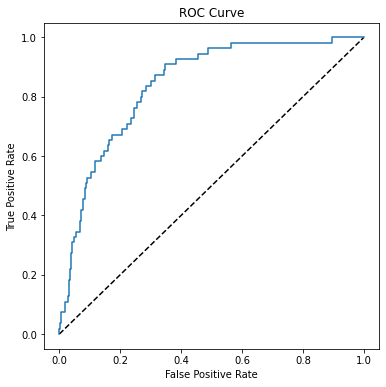

In [38]:
# Get predictions from test data
predictions = model.predict(X_test)

# Get evaluation metrics
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

# calculate ROC curve
y_scores = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## 16. Save the classification model

In [39]:
# Save the model as a pickle file
filename = './models/preprocessing_logistic_regression_stroke_model.pkl'
joblib.dump(model, filename)

['./models/preprocessing_logistic_regression_stroke_model.pkl']

## 17. Try a random forest algorithm

As the results aren't significantly better after adding the pipeline we will try a different algorithm to improve the overall recall.

This time, We'll use the same preprocessing steps as before, but we'll train the model using an *ensemble* algorithm named *Random Forest* that combines the outputs of multiple random decision trees.

In [40]:
model = RandomForestClassifier(random_state=0).fit(X_train, y_train)

## 18. Use the model predict labels for our test set, and compare the performance metrics with the model we created previously.

Confusion Matrix:
 [[1418    0]
 [  54    1]] 

Accuracy: 0.9633401221995926
Overall Precision: 1.0
Overall Recall: 0.01818181818181818

AUC: 0.8407616361071931


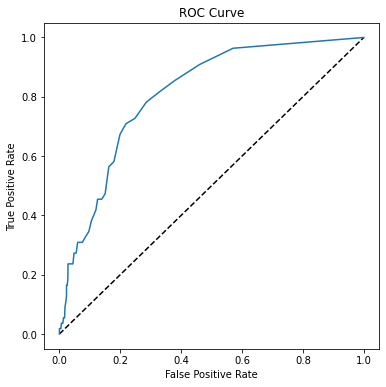

In [41]:
predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
y_scores = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## 19. Save the classification model

In [42]:
# Save the model as a pickle file
filename = './models/random_forest_stroke_model.pkl'
joblib.dump(model, filename)

['./models/random_forest_stroke_model.pkl']

## 20. Now we try the random forest classifier with the pipeline

In [43]:
# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', RandomForestClassifier(random_state=0))])

# fit the pipeline to train a random forest model on the training set
model = pipeline.fit(X_train, (y_train))
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [1, 7, 8]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 2, 3, 4, 6, 9])])),
                ('logregressor', RandomForestClassifier(random_state=0))])


## 21. Use the model trained by this pipeline to predict labels for our test set, and compare the performance metrics with the basic model we created previously.

Confusion Matrix:
 [[1414    4]
 [  54    1]] 

Accuracy: 0.9606245756958588
Overall Precision: 0.2
Overall Recall: 0.01818181818181818

AUC: 0.8091037312475958


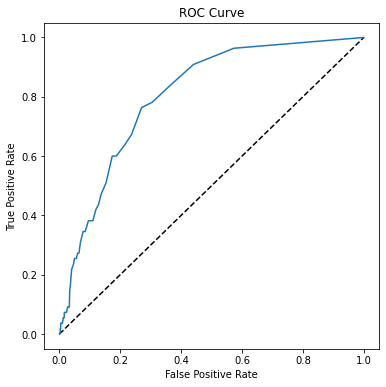

In [44]:
predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
y_scores = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## 22. Save the classification model

In [45]:
# Save the model as a pickle file
filename = './models/preprocessing_random_forest_stroke_model.pkl'
joblib.dump(model, filename)

['./models/preprocessing_random_forest_stroke_model.pkl']

## 23. Test the models

In [46]:
out = widgets.Output(layout={'border': '0.5px solid black'})

# Load the models from the files

ensemble_filename = './models/random_forest_stroke_model.pkl'
ensemble_model = joblib.load(ensemble_filename)
    
regression_filename = './models/logistic_regression_stroke_model.pkl'
regression_model = joblib.load(regression_filename)


def predict_stroke(button):
    try:
        input_sample = []
        input_sample = np.array([gender.value, age.value, hypertension, heart_disease.value, ever_married.value, work_type.value, residence_type.value, avg_glucose_level.value, bmi.value, smoking_status.value], ndmin=2)
        ensemble_input_predictions = ensemble_model.predict(input_sample)
        regression_input_predictions = regression_model.predict(input_sample)
        global out
        out.clear_output()
        with out:
            if regression_input_predictions[0] == 1:
                print('The patient is predicted to be at high risk of a stroke by the logistic regression model.')
            else:
                print('The patient is not predicted to be at high risk of a stroke by the logistic regression model.')
            if ensemble_input_predictions[0] == 1:
                print('The patient is predicted to be at high risk of a stroke by the ensemble model.\n')
            else:
                print('The patient is not predicted to be at high risk of a stroke by the ensemble model.\n')
        test_button.description='Successful!'
        test_button.icon="check"
        test_button.button_style='success'
        time.sleep(3)
        # Reset the Button 
        test_button.description='Predict Stroke'
        test_button.icon="refresh"
        test_button.button_style='primary'
    except:
        test_button.description='Failed!'
        test_button.icon="exclamation"
        test_button.button_style='danger'
        time.sleep(3)
        # Reset the Button 
        test_button.description='Predict Stroke'
        test_button.icon="refresh"
        test_button.button_style='primary'


style = {'description_width': 'initial'}

gender = widgets.BoundedFloatText(
    value=0.0,
    min=0,
    max=1,
    step=1,
    description='Gender:',
    disabled=False,
    style=style
)

age = widgets.BoundedFloatText(
    value=0.0,
    min=0,
    max=100,
    step=1,
    description='Age:',
    disabled=False,
    style=style
)

hypertension = widgets.BoundedFloatText(
    value=0.0,
    min=0,
    max=1,
    step=1,
    description='Hypertension:',
    disabled=False,
    style=style
)

heart_disease = widgets.BoundedFloatText(
    value=0.0,
    min=0,
    max=1,
    step=1,
    description='Heart Disease:',
    disabled=False,
    style=style
)

ever_married = widgets.BoundedFloatText(
    value=0.0,
    min=0,
    max=1,
    step=1,
    description='Ever Married:',
    disabled=False,
    style=style
)

work_type = widgets.BoundedFloatText(
    value=0.0,
    min=0,
    max=4,
    step=1,
    description='Work Type:',
    disabled=False,
    style=style
)

residence_type = widgets.BoundedFloatText(
    value=0.0,
    min=0,
    max=1,
    step=1,
    description='Residence Type:',
    disabled=False,
    style=style
)

avg_glucose_level = widgets.BoundedFloatText(
    value=0.0,
    min=0,
    max=400.0,
    step=0.1,
    description='Average Glucose Level:',
    disabled=False,
    style=style
)

bmi = widgets.BoundedFloatText(
    value=0.0,
    min=0,
    max=100.0,
    step=0.1,
    description='BMI:',
    disabled=False,
    style=style
)

smoking_status = widgets.BoundedFloatText(
    value=0.0,
    min=0,
    max=3,
    step=1,
    description='Smoking Status:',
    disabled=False,
    style=style
)

test_button=widgets.Button(
    description='Predict Stroke',
    disabled=False,
    button_style='primary', 
    tooltip="Click to predict if the patient is at risk of a stroke",
    icon='refresh')

form=widgets.VBox([gender, age, hypertension, heart_disease, ever_married, work_type, residence_type, avg_glucose_level, bmi, smoking_status])   

button_form = widgets.VBox([test_button, out])

display_form = widgets.HBox([form, button_form])

display(display_form)

test_button.on_click(predict_stroke)